# The Spark Foundation
## <font color=blue>*Data Science & Business Analytics Task 1*</font>
### Intern Name: SREENIDHI 


# 1. Prediction using Supervised Machine Learning
### Problem Statement : Predicting the percentage of a student based on the no.of study hours.

# Importing libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
%matplotlib inline

# Reading data from remote link

In [32]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [33]:
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [34]:
df.shape

(25, 2)

 Data set has 25 rows  2 columns

In [35]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Statistical details of dataset

In [36]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### Let's plot our data points on 2-D graph and see if we can manually find any relationship between the data. 

Text(0.5, 1.0, 'Hours vs Scores')

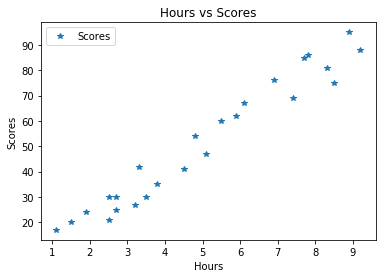

In [37]:
df.plot(x='Hours',y='Scores',style='*')
ply.xlabel('Hours')
ply.ylabel('Scores')
ply.title('Hours vs Scores')

Above graph shows the positive linear realtionship between hours & scores

# Preparing the dataset
#### Dividing the data into attributes and labels

In [38]:
X=df.iloc[:, :-1]
y=df.iloc[:, 1]

#### Importing train_test_spilt from sklearn 

In [39]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Training the dataset
### Using scikit_learn import linear regression and call fit() method

In [40]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

To retrive the intercept:

In [41]:
regressor.intercept_

1.6675881491388793

To retrive the slope:

In [42]:
regressor.coef_

array([10.02844508])

Eqution of straight line is y=mx+c  
m=slope , c=Intercept


In [17]:
line = regressor.coef_* X + regressor.intercept_ 

 Slope = regressor.coef_  
Intercept= regressor.intercept_

### Plotting the regression line for test data

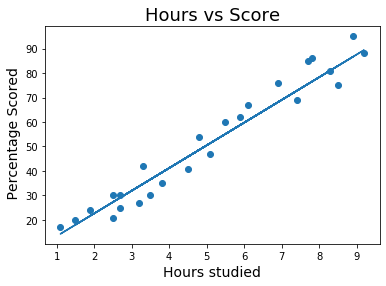

In [43]:
ply.scatter(X,y)
ply.plot(X,line)
ply.xlabel('Hours studied',fontsize=14)
ply.ylabel(' Percentage Scored',fontsize=14)
ply.title('Hours vs Score',fontsize=18)
ply.show()

## Making predictions

In [44]:
y_pred=regressor.predict(x_test)
print(x_test)

    Hours
8     8.3
15    8.9
2     3.2
3     8.5
13    3.3


y_pred is a numpy array that contains all predicted values for the input values in the x_test

### Comparing actual vs predicted dataset

In [45]:
ap=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(ap)

    Actual  Predicted
8       81  84.903682
15      95  90.920749
2       27  33.758612
3       75  86.909371
13      42  34.761457


In [46]:
# Testing with own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 94.43070514601649


## Evaluating the algorithm
#### Evaluating performance of model .
This step is used to compare how well different algorithms perform on paticular dataset.

In [47]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6.777891955787678
54.35749892729727
7.372753822507386


Conclusion : If a student studies for 9.25 hours/day his predicted score is 93.7